### Aula 12: SciPy - Estatística, Integração e Otimização

📊 PARTE 1: ESTATÍSTICA  
🔍 Exemplo 1: Distribuição Normal e Análise Estatística

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate, optimize

# Gerando dados simulando a produtividade de uma cultura (t/ha)
np.random.seed(42)
produtividade = np.random.normal(loc=6.5, scale=1.2, size=1000)

# Média e desvio padrão
media = np.mean(produtividade)
desvio_padrao = np.std(produtividade)

print(f"Média: {media:.2f} t/ha")
print(f"Desvio padrão: {desvio_padrao:.2f} t/ha")

# Teste de normalidade (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(produtividade)
print(f"Teste Shapiro: p-valor = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Os dados seguem uma distribuição normal (p > 0.05)")
else:
    print("Os dados NÃO seguem uma distribuição normal (p <= 0.05)")

Média: 6.52 t/ha
Desvio padrão: 1.17 t/ha
Teste Shapiro: p-valor = 0.6273
Os dados seguem uma distribuição normal (p > 0.05)


🧮 PARTE 2: INTEGRAÇÃO  
🔍 Exemplo 2: Cálculo da área sob uma curva de crescimento de plantas

Área sob a curva (0 a 10 dias): 3.9466
Erro estimado: 1.03e-11


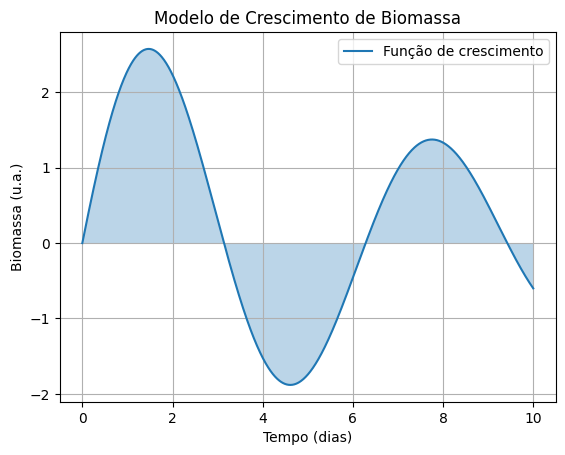

In [3]:
# Função que modela crescimento de biomassa ao longo do tempo (exemplo)
def crescimento(t):
    return 3 * np.exp(-0.1 * t) * np.sin(t)

# Integrando a função de crescimento entre 0 e 10 dias
area_biomassa, erro = integrate.quad(crescimento, 0, 10)

print(f"Área sob a curva (0 a 10 dias): {area_biomassa:.4f}")
print(f"Erro estimado: {erro:.2e}")

# Plotando a função
t = np.linspace(0, 10, 1000)
plt.plot(t, crescimento(t), label='Função de crescimento')
plt.fill_between(t, crescimento(t), where=(t >= 0) & (t <= 10), alpha=0.3)
plt.title('Modelo de Crescimento de Biomassa')
plt.xlabel('Tempo (dias)')
plt.ylabel('Biomassa (u.a.)')
plt.legend()
plt.grid()
plt.show()

⚙️ PARTE 3: OTIMIZAÇÃO  
🔍 Exemplo 3: Otimização de uso de fertilizante para maximizar lucro

Quantidade ótima de fertilizante: 65.10 kg/ha
Lucro máximo estimado: R$ 55.80


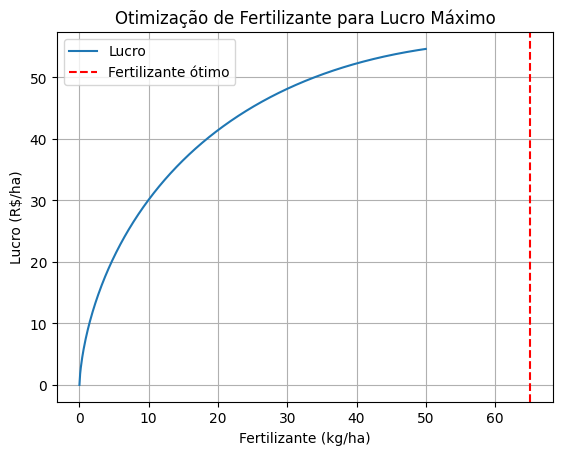

In [5]:
# === PARTE 3: OTIMIZAÇÃO ===

# Função objetivo: lucro baseado na quantidade de fertilizante (kg/ha)
def lucro(fert):
    receita = 10 * fert**0.7  # modelo simplificado de produtividade
    custo = 2 * fert          # custo do fertilizante
    return -(receita - custo)  # negativo para minimizar (maximizar lucro)

# Otimizando a quantidade de fertilizante
resultado = optimize.minimize(lucro, x0=10, bounds=[(0, 100)])

print(f"Quantidade ótima de fertilizante: {resultado.x[0]:.2f} kg/ha")
print(f"Lucro máximo estimado: R$ {-resultado.fun:.2f}")

# Plotando a função lucro
fert_range = np.linspace(0, 50, 500)
lucro_vals = -np.array([lucro(f) for f in fert_range])  # Corrigido para evitar erro de tipo

plt.plot(fert_range, lucro_vals, label='Lucro')
plt.axvline(x=resultado.x[0], color='r', linestyle='--', label='Fertilizante ótimo')
plt.title('Otimização de Fertilizante para Lucro Máximo')
plt.xlabel('Fertilizante (kg/ha)')
plt.ylabel('Lucro (R$/ha)')
plt.legend()
plt.grid()


Para otimizar o desempenho, pode-se vetorizar a função lucro para aceitar diretamente arrays:

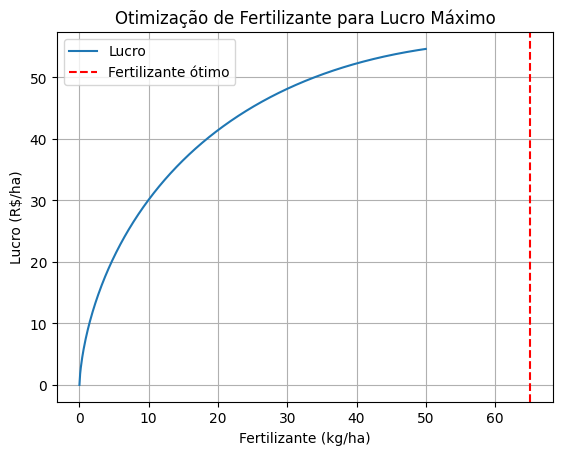

In [6]:
def lucro_vetorizado(fert):
    receita = 10 * fert**0.7
    custo = 2 * fert
    return -(receita - custo)

fert_range = np.linspace(0, 50, 500)
lucro_vals = -lucro_vetorizado(fert_range)  # Aplicação direta no array

plt.plot(fert_range, lucro_vals, label='Lucro')
plt.axvline(x=resultado.x[0], color='r', linestyle='--', label='Fertilizante ótimo')
plt.title('Otimização de Fertilizante para Lucro Máximo')
plt.xlabel('Fertilizante (kg/ha)')
plt.ylabel('Lucro (R$/ha)')
plt.legend()
plt.grid()
plt.show()